In [2]:
# Import basic Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

#Read in csv of cleaned data for the full regression(71 predictors: df1)
df = pd.read_csv('Model1.csv')
print(df.shape)
df.head()


(1623, 71)


,drugmort,aamort,chmort,infmort,physdistr,mentdistr,diabetic,hiv,foodins,healthyfood,...,X20income,singparent,socialassoc,violcrime,severehous,commute,new_pcp_ratio,new_mhp_ratio,new_othpcp_ratio,new_dent_ratio
0,10,468.0,55.0,7.0,12,13,13,205.0,14,10,...,22695,25,13.7,266.0,15,43,2408.0,7907.0,4257.0,3256
1,17,361.0,48.0,6.0,12,12,10,169.0,14,5,...,22065,27,11.5,217.0,15,38,1352.0,1198.0,2680.0,2100
2,15,521.0,105.0,12.0,13,13,15,120.0,16,2,...,18287,30,10.2,147.0,14,47,2501.0,1980.5,2053.0,5646
3,21,445.0,44.0,6.0,13,13,14,96.0,12,1,...,20679,27,8.5,212.0,12,60,5247.0,14418.0,11535.0,5243
4,13,550.0,70.0,8.0,14,14,15,198.0,18,10,...,16369,40,14.7,574.0,15,30,1505.0,1123.0,2360.0,1807


## Set up variables and scale the features

In [3]:
# Import sklearn regression modules
from sklearn.linear_model import LinearRegression

#Set up variables: X, y
df1= df.drop('drugmort', axis = 1)
X = df1.values
y = df['drugmort'].values


In [4]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features
X = scale(X)
y = scale(y)


C:\Users\Valery\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


## Linear regression - full, untransformed, scaled: Model 1 (from R)

In [14]:
# Import necessary modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 training set: {}".format(reg_all.score(X_train, y_train)))

rmsemod1 = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error testing set: {}".format(rmsemod1))

R^2 training set: 0.5931242936943508
Root Mean Squared Error testing set: 0.7254064261627756


## 10-Fold cross validation on full, untransformed linear model

In [6]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score

# Compute 10-fold cross-validation scores: cv_reg
cv_reg = cross_val_score(reg_all, X, y, cv=10)

# Print the 10-fold cross-validation scores
print(cv_reg)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_reg)))

[0.10265658 0.12375062 0.52131774 0.46140252 0.34492194 0.30942162
 0.33721213 0.45249759 0.34786868 0.5842513 ]
Average 10-Fold CV Score: 0.3585300701892621


## Ridge Regression: Full/untransformed data

### 1) Determine the best alpha level

In [7]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

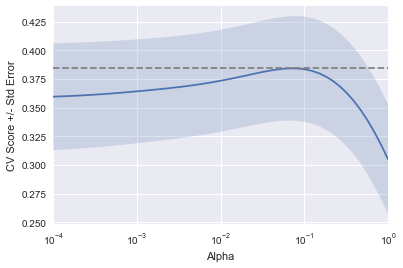

In [8]:
# Import necessary modules
from sklearn.linear_model import Ridge

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

### 2) Run Ridge regression on full/untransformed

In [9]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: ridge
ridge1 = Ridge(alpha=0.08, normalize=True)

# Fit the regressor to the training data
ridge1.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = ridge1.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 training set: {}".format(ridge1.score(X_train, y_train)))
rmse_ridge1 = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error testing set: {}".format(rmse_ridge1))

R^2 training set: 0.574171134184982
Root Mean Squared Error testing set: 0.7205538627607094


### 3) 10-fold cross-validation:  Ridge on full/untransformed data

In [10]:
# Compute 10-fold cross-validation scores: cv_ridge1
cv_ridge1 = cross_val_score(ridge1, X, y, cv=10)

# Print the 10-fold cross-validation scores
print(cv_ridge1)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_ridge1)))

[0.09297206 0.17317788 0.53291541 0.51360946 0.39568578 0.35639954
 0.36176299 0.43453816 0.40983338 0.57204007]
Average 10-Fold CV Score: 0.3842934734222261


## Linear and Ridge regressions using transformed data (log)

In [11]:
#Read in csv of transformed data: dftrans
dftrans = pd.read_csv('Model3.csv')
print(dftrans.shape)
dftrans.head()


(1623, 71)


,drugmort,aamort,chmort,infmort,physdistr,mentdistr,diabetic,hiv,foodins,healthyfood,...,X20income,singparent,socialassoc,violcrime,severehous,commute,new_pcp_ratio,new_mhp_ratio,new_othpcp_ratio,new_dent_ratio
0,2.302585,6.148468,4.007333,1.945910,2.484907,2.564949,13,205.0,14,10,...,10.029900,3.218876,13.7,5.583496,2.708050,43,2408.0,8.975504,8.356320,8.088255
1,2.833213,5.888878,3.871201,1.791759,2.484907,2.484907,10,169.0,14,5,...,10.001748,3.295837,11.5,5.379897,2.708050,38,1352.0,7.088409,7.893572,7.649693
2,2.708050,6.255750,4.653960,2.484907,2.564949,2.564949,15,120.0,16,2,...,9.813946,3.401197,10.2,4.990433,2.639057,47,2501.0,7.591105,7.627057,8.638703
3,3.044522,6.098074,3.784190,1.791759,2.564949,2.564949,14,96.0,12,1,...,9.936874,3.295837,8.5,5.356586,2.484907,60,5247.0,9.576233,9.353141,8.564649
4,2.564949,6.309918,4.248495,2.079442,2.639057,2.639057,15,198.0,18,10,...,9.703145,3.688879,14.7,6.352629,2.708050,30,1505.0,7.023759,7.766417,7.499423


In [12]:
#This is the df for the linear regression: Step, Transformed

df35 = dftrans[['drugmort','aamort', 'chmort' , 'infmort' , 'mentdistr' , 
    'foodins' , 'mvmort' , 'uninsure' , 'chuninsure' , 'disconyouth' , 
    'homicide' , 'under18' , 'over65' , 'aframer' , 'amerindian' , 'asian' , 
    'hawaiin' , 'hispanic' , 'rural' , 'lifelost' , 'fairhealth' , 'lowbirth' , 
    'physinactive' , 'excdrinking' , 'alcoholdrive' , 'chlamydia' , 'unemployed' , 
    'chpovertyw' , 'X80income' , 'singparent' , 'socialassoc' , 'severehous' , 
    'commute' , 'new_pcp_ratio' , 'new_mhp_ratio']]
print(df35.shape)
df35.head()

(1623, 35)


,drugmort,aamort,chmort,infmort,mentdistr,foodins,mvmort,uninsure,chuninsure,disconyouth,...,chlamydia,unemployed,chpovertyw,X80income,singparent,socialassoc,severehous,commute,new_pcp_ratio,new_mhp_ratio
0,2.302585,6.148468,4.007333,1.945910,2.564949,14,2.944439,14,3,12.0,...,5.986452,5.2,11.0,97896,3.218876,13.7,2.708050,43,2408.0,8.975504
1,2.833213,5.888878,3.871201,1.791759,2.484907,14,2.708050,20,5,16.0,...,5.831882,5.5,14.0,99839,3.295837,11.5,2.708050,38,1352.0,7.088409
2,2.708050,6.255750,4.653960,2.484907,2.564949,16,3.091042,17,4,25.0,...,6.095825,6.6,18.0,78138,3.401197,10.2,2.639057,47,2501.0,7.591105
3,3.044522,6.098074,3.784190,1.791759,2.564949,12,3.044522,21,6,13.0,...,4.820282,5.4,21.0,83484,3.295837,8.5,2.484907,60,5247.0,9.576233
4,2.564949,6.309918,4.248495,2.079442,2.639057,18,2.708050,18,3,20.0,...,6.584791,7.0,21.0,79864,3.688879,14.7,2.708050,30,1505.0,7.023759


## Set up variables and scale the features: Full/transformed, step/transformed

In [13]:
#Set up variables for Full/transformed and Step/transformed: Xft, yft, Xst
dftrans2 = dftrans.drop('drugmort', axis = 1)
Xft = dftrans2.values
yft = dftrans['drugmort'].values

df35_2 = df35.drop('drugmort', axis = 1)
Xst = df35_2.values
yst = df35['drugmort'].values


In [14]:
# Scale the features
Xft = scale(Xft)
yft = scale(yft)

Xst = scale(Xst)
yst = scale(yst)

## Linear regression - Step, transformed, scaled

In [15]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xst, yst, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_step = LinearRegression()

# Fit the regressor to the training data
reg_step.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_step.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 training set: {}".format(reg_step.score(X_train, y_train)))

rmse_step = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error testing set: {}".format(rmse_step))


R^2 training set: 0.5677852052635599
Root Mean Squared Error testing set: 0.6490841781141684


In [16]:
# Compute 10-fold cross-validation scores: cv_step
cv_step = cross_val_score(reg_step, Xst, yst, cv=10)

# Print the 10-fold cross-validation scores
print(cv_step)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_step)))

[0.24672519 0.29910195 0.58832297 0.48508654 0.45870452 0.38265053
 0.45915632 0.49835549 0.40817547 0.70465947]
Average 10-Fold CV Score: 0.4530938467232426


## Ridge Regression: Full/transformed data

### 1) Determine the best alpha level

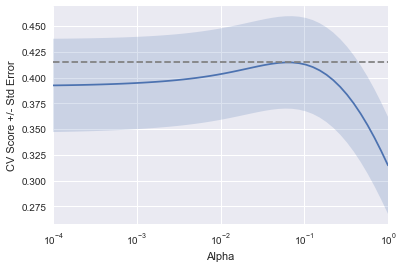

In [17]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, Xft, yft, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Use 0.08 as before

### 2) Run Ridge regression on full/transformed data

In [18]:

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xft, yft, test_size = 0.3, random_state=42)

# Create the regressor: ridge
ridge2 = Ridge(alpha=0.08, normalize=True)

# Fit the regressor to the training data
ridge2.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = ridge2.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 training set: {}".format(ridge2.score(X_train, y_train)))
rmse_ridge2 = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error testing set: {}".format(rmse_ridge2))

R^2 training set: 0.5633423765818528
Root Mean Squared Error testing set: 0.6699886296955986


### 3) 10-fold cross-validation:  Ridge on full/transformed data

In [19]:
# Compute 10-fold cross-validation scores: cv_ridge2
cv_ridge2 = cross_val_score(ridge2, Xft, yft, cv=10)

# Print the 10-fold cross-validation scores
print(cv_ridge2)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_ridge2)))

[0.13694898 0.29958846 0.54824298 0.48637592 0.43179191 0.29410167
 0.45408188 0.4391111  0.372112   0.68100449]
Average 10-Fold CV Score: 0.41433593795083634


## CONCLUSIONS:  

The best R^2 score was with the Ridge regression model with the full, untransformed data (0.57417113). The best RMSE score and the best CV-score were obtained with the Linear regression model with the step-transformed data (0.649084, 0.4530938). Because the purpose of this study is to predict missing values, the Linear regression model with the step-transformed data is the best choice. This model will be used to predict the missing values and produce a completed, estimated map.

## Train a final model

Run the Linear regresssion model above on the complete step-transformed dataframe: df35

In [27]:
model = LinearRegression()
model_step = model.fit(Xst, yst)

print("R^2 final model: {}".format(model_step.score(Xst, yst)))

R^2 final model: 0.5769178491064739


## Predict missing drug overdose mortality values